<a href="https://colab.research.google.com/github/devyoungjin/ML/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

equation == constriction == 미지수

Issue with Rich Representation:
Low error on input data points, but high error nearby

Low error on training data, but high error on testing data


Fundmetal problem: we are optimizing parameters to solve

$\displaystyle\min_{\theta}$ 
$\displaystyle\sum_{i=1}^{m}loss({ y_i,\hat y_i)}$

But what we really care about is loss of prediction on new data(x,y)
- also called generalization error

- Devide data into training set and validation set

Regularization(Shrinkage Methods)
- With many features, prediction function becomes very expressive(model complexity)

1. Choose less expressive function
2. Keep the magnitutde of the parameter small
3. Regularization: penalize  large parameters Θ

$min\|\PhiΘ-y\|_{2}^{2}$ + $\|λΘ\|_{2}^{2}$ 

- $min\|\PhiΘ-y\|_{2}^{2}$ == loss
- λ: regularization parameter, trade off  between low loss and small valus of Θ  (==tuning parameter)

Often, overfitting associated with very large estimated parameters

In short.

Total cost = $min\|\PhiΘ-y\|_{2}^{2}$ + $\|λΘ\|_{2}^{2}$ = measure of fit + λ * measure of magnitute of coefficients



Reguliztion이외 방법: 트레이닝 데이터셋 갯수 추가
Data augmentation: (데이타 추가하기)
- The simplest way to reduce overfitting is to  increase the size of the training data.

ex) lotation, size , etc 

but  added different  data = perspective of big data 


Early stopping:
- when we see that the performance on the validation set is getting worse, we immediately stop the training on the model.

1. Regression with Polynomial Functions¶
Nonlinear regression

(= linear regression for non-linearly distributed data)

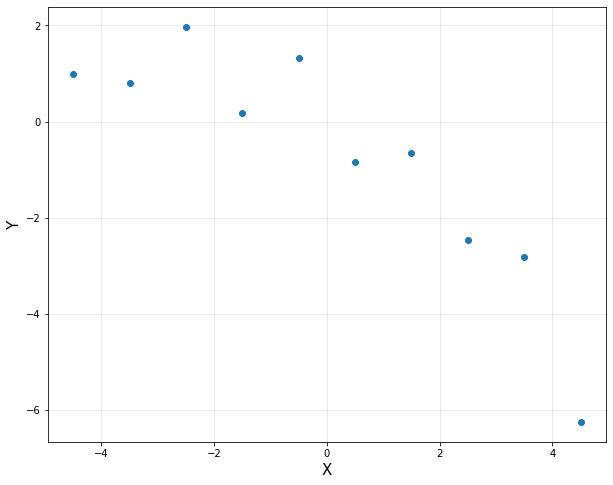

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)

In [2]:
p = np.polyfit(x, y, deg = 1)

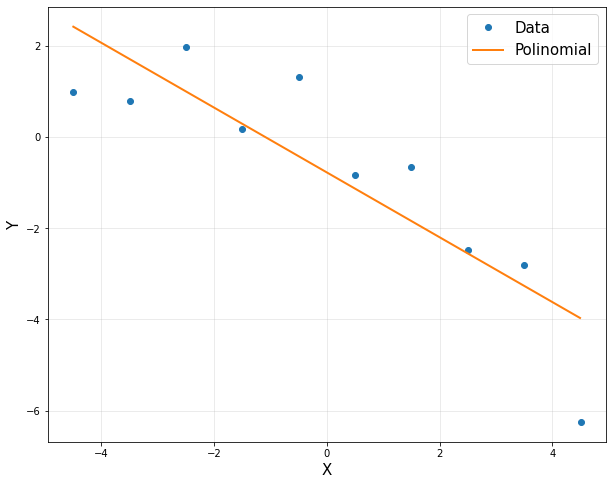

In [3]:
xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

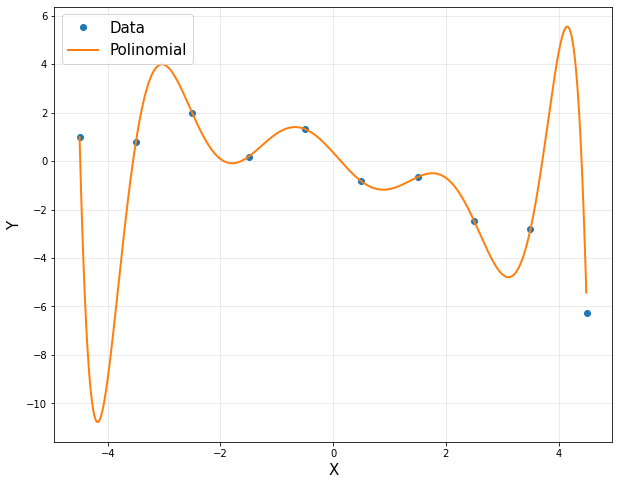

In [4]:
p = np.polyfit(x, y, deg = 9)

xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


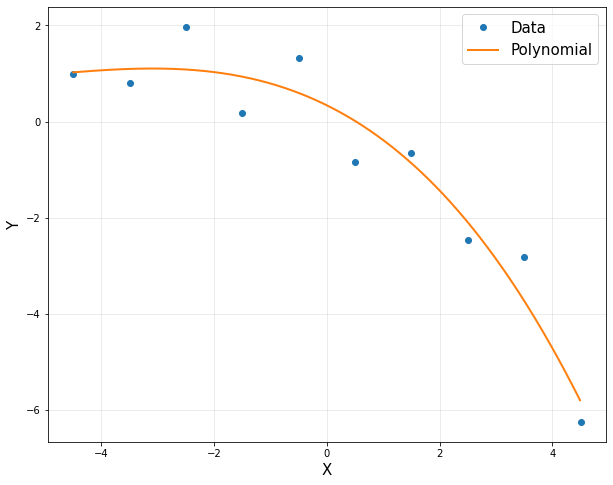

In [5]:
p = np.polyfit(x, y, deg = 3)

xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize=(10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polynomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

2. Polynomial Regression in TensorFlow
Construct explicit feature vectors

Consider linear combinations of fixed nonlinear functions of the input variables, of the form




$\left[\begin{array}{ccc}
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2 \\
\vdots& \vdots & \vdots \\
1 & x_m & x_m^2 
\end{array}\right]$
$\left[\begin{array}{ccc}
Θ_0\\
Θ_1\\
Θ_2\\
\end{array}\right]$
$\to$
$\left[\begin{array}{ccc}
| & | & |\\
b_0(x) & b_1(x) & b_2(x) \\
|& | & | \\
\end{array}\right]$
$\left[\begin{array}{ccc}
Θ_0\\
Θ_1\\
Θ_2\\
\end{array}\right]$

$\hat y$ =
$\displaystyle\sum_{i=1}^{m}Θ_ib_i({ x)}$ = $\PhiΘ$

In [6]:
from sklearn.preprocessing import MaxAbsScaler

# 10 data points
m = 10
train_x = np.linspace(-4.5, 4.5, 10).reshape(-1,1)
train_y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1,1)

d = 9
train_X = np.hstack([train_x**(i+1) for i in range(d)])
train_X = MaxAbsScaler().fit_transform(train_X)
train_X = np.asmatrix(train_X)

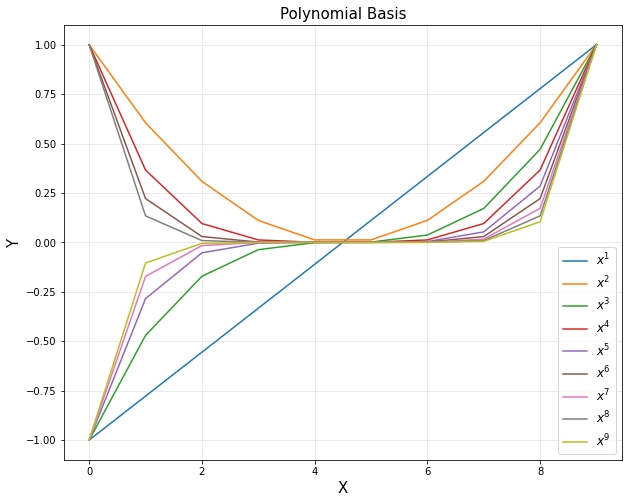

In [7]:
plt.figure(figsize = (10,8))  

for i in range(d):
    plt.plot(train_X[:,i], label = '$x^{}$'.format(i+1))
 
plt.title('Polynomial Basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [14]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

In [9]:

LR = 0.4                                                   
n_iter = 300000

x = tf.placeholder(tf.float32, [m, d])
y = tf.placeholder(tf.float32, [m, 1])

w = tf.Variable(tf.random_normal([d, 1]))
b = tf.Variable(tf.random_normal([1, 1]))

y_pred = tf.add(tf.matmul(x, w), b)
loss = tf.square(y_pred - y)
loss = tf.reduce_mean(loss)

optm = tf.train.AdamOptimizer(LR).minimize(loss)
init = tf.global_variables_initializer()

loss_record = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):                                                                         
        sess.run(optm, feed_dict = {x: train_X, y: train_y})  
        loss_record.append(sess.run(loss, feed_dict = {x: train_X, y: train_y}))
        
    w_val = sess.run(w)
    b_val = sess.run(b)

In [10]:
xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
Xp = np.hstack([xp**(i+1) for i in range(d)])
Xp = MaxAbsScaler().fit_transform(Xp)
Xp = np.asmatrix(Xp)
yp = Xp*w_val + b_val

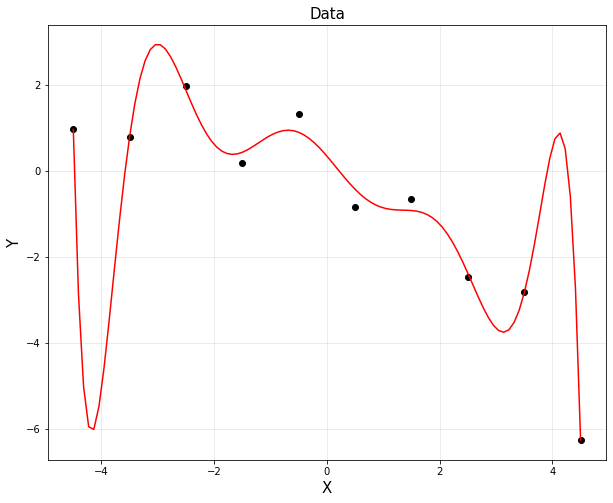

In [11]:
plt.figure(figsize=(10,8))
plt.plot(train_x,train_y,'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
#plt.axis('equal')
plt.grid(alpha = 0.3)
#plt.xlim([0, 5])
plt.show()

In [15]:

LR = 0.4                                                   
n_iter = 3000

x = tf.placeholder(tf.float32, [m, d])
y = tf.placeholder(tf.float32, [m, 1])

w = tf.Variable(tf.random_normal([d, 1]))
b = tf.Variable(tf.random_normal([1, 1]))

lamb = 0.1
y_pred = tf.add(tf.matmul(x, w), b)
loss = tf.reduce_mean(tf.square(y_pred - y))
reg = tf.reduce_mean(tf.square(w)) #fixed
loss = tf.reduce_mean(loss + lamb*reg) #added 

optm = tf.train.AdamOptimizer(LR).minimize(loss)
init = tf.global_variables_initializer()

loss_record = []
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_iter):                                                                         
        sess.run(optm, feed_dict = {x: train_X, y: train_y})  
        loss_record.append(sess.run(loss, feed_dict = {x: train_X, y: train_y}))
        
    w_val = sess.run(w)
    b_val = sess.run(b)



In [16]:
xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
Xp = np.hstack([xp**(i+1) for i in range(d)])
Xp = MaxAbsScaler().fit_transform(Xp)
Xp = np.asmatrix(Xp)
yp = Xp*w_val + b_val

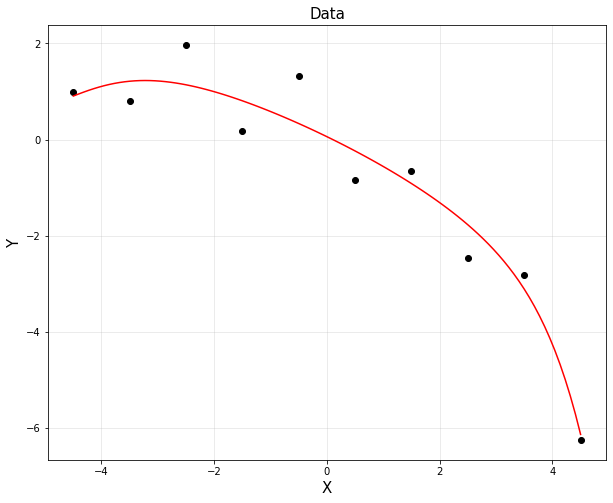

In [17]:
plt.figure(figsize=(10,8))
plt.plot(train_x,train_y,'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
#plt.axis('equal')
plt.grid(alpha = 0.3)
#plt.xlim([0, 5])
plt.show()